In [1]:
from jBook_tools import *
plt.rcParams['figure.figsize'] = [10, 5] #Plotgröße anpassen

from myst_nb import glue
from scipy.fft import fft, fftfreq,rfft, rfftfreq
from scipy.interpolate import interp1d
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

def find_nearest_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def generate_wave(freq, sample_rate, duration,**kwargs):
    try:
        phaseshift = kwargs['phaseshift']
    except:
        phaseshift = 0   
    try:
        amplitude = kwargs['amplitude']
    except:
        amplitude = 1           
    
    x = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)
    if 'form' in kwargs:
        if kwargs['form'] == 'cos':
            y = amplitude*np.cos((2 * np.pi) * x*freq + phaseshift)
        elif kwargs['form'] == 'sin':
            y = amplitude*np.sin((2 * np.pi) * x*freq + phaseshift)
        else:
            print('WARNING: unsopported waveform. Using sinus.')
            y = amplitude*np.sin((2 * np.pi) * x*freq + phaseshift)
    else:
        y = amplitude*np.sin((2 * np.pi) * x*freq + phaseshift)               
    return x, y

def generate_AM_wave(freq_c, amp_c, freq_m, amp_m, sample_rate, duration):
    x = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)
    y = (amp_c+amp_m*np.cos(2*np.pi*x*freq_m))*np.cos(2*np.pi*x*freq_c)
    return x, y

def generate_AM_wave2(time,freq_c,amp_c,modulator):
    x = time
    y = (amp_c+modulator)*np.cos(2*np.pi*x*freq_c)
    return x, y



def plot_vs_time(time,**kwargs):
    if 'show_time' in kwargs:
        idx1 = find_nearest_idx(time, kwargs['show_time'])
        #print(idx1)
        del kwargs['show_time']
    legend = []
    for key, value in kwargs.items():
        #print("{0} = {1}".format(key, value))
        if 'idx1' in locals():
            plt.plot(time[0:idx1],value[0:idx1])
        else:        
            plt.plot(time,value)
        
        legend.append(key)
    plt.grid()
    #plt.text(time[0],value[-1],'$m = ' + str(max()))
    plt.legend(legend)
    plt.xlabel('Time in s')
    plt.ylabel('Amplitude')
    plt.show()
        
def plot_fft(time,**kwargs):
    if 'xlim' in kwargs:
        plt.xlim(kwargs['xlim'])
        del kwargs['xlim']
    if 'ytype' in kwargs:
        ytype = kwargs['ytype']
        del kwargs['ytype']
    if 'yscale' in kwargs:
        yscale = kwargs['yscale']
        del kwargs['yscale']
    else:
        yscale = 'log'
        
    N = len(time)
     #sample_rate = 1/ time[1]-time[0]
    xf = fftfreq(N, (time[1]-time[0]))
    legend = []
    for key, value in kwargs.items():
        yf = fft(value)
        plt.plot(xf, np.abs(yf))
        legend.append(key)

    plt.legend(legend)
    plt.grid()
    plt.xlabel('Frequency in rad/s')
    plt.ylabel('Power')
    plt.show()
    
def plot_rfft_amp(time,**kwargs):
    if 'xlim' in kwargs:
        plt.xlim(kwargs['xlim'])
        del kwargs['xlim']
    if 'ytype' in kwargs:
        ytype = kwargs['ytype']
        del kwargs['ytype']
    if 'yscale' in kwargs:
        yscale = kwargs['yscale']
        del kwargs['yscale']
    else:
        yscale = 'log'
            
    
    N = len(time)
     #sample_rate = 1/ time[1]-time[0]
    xf = rfftfreq(N, (time[1]-time[0]))
    legend = []
    for key, value in kwargs.items():
        yf = rfft(value)
        if 'ytype' in locals():
            if ytype == 'pow':
                yf =  np.round((np.abs(yf)**2)/N,4)
                plt.ylabel('Power')
            elif ytype == 'rms':
                yf =  np.round(np.sqrt(2)*np.abs(yf)/N,4)
                plt.ylabel('rms')
            elif ytype == 'amp':
                yf = np.round(2*np.abs(yf)/N,4)
                plt.ylabel('Amplitude')
            else:
                print('WARNING: unknown ytype. Using default amplitude.')
                yf_amp = np.round(2*np.abs(yf)/N,4)
                plt.ylabel('Amplitude')
                
        else:
              yf = np.round(2*np.abs(yf)/N,4)
              plt.ylabel('Amplitude')
        plt.plot(xf, yf)
        legend.append(key)
            
    plt.legend(legend)
    plt.grid()
    plt.xlabel('Frequency in rad/s')
    
    plt.yscale(yscale)
    plt.show()
    
def generate_wavelet(fmin,fmax,amp,sample_rate, duration):
    x = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)

    freq = np.linspace(fmin, fmax, int(duration * sample_rate), endpoint=False)
    
    dx = x[1]-x[0]

    x_plot = (freq * dx ).cumsum()    # Cumsum freq * change in x

    y = amp*np.sin(2 * np.pi * x_plot)
    #plt.plot(x, y, label="sin(freq(x) * x)")
    #plt.plot(x, freq, label="freq(x)")
    #plt.legend()
    #plt.show()
    return x,y

def plt_mod_trap(signal_m,signal_AM):
    plt.plot(signal_m,signal_AM)
    plt.grid()
    plt.xlabel('Modulator $u(t)_m$')
    plt.ylabel('Modulated Signal $u(t)_{AM}$')
    plt.show()

In [2]:
ut = symbols('u(t)')
sym_legend = assign_meta_data(sym_legend,ut,'Spannung in abhängigkeit der Zeit')

utc = symbols('u(t)_c')
sym_legend = assign_meta_data(sym_legend,utc,'Spannungsverlauf des Trägers')

utm = symbols('u(t)_m')
sym_legend = assign_meta_data(sym_legend,utm,'Spannungsverlauf des Modulators')

utAM = symbols('u(t)_AM')
sym_legend = assign_meta_data(sym_legend,utAM,'AM Moduliertes Signal')

U = symbols('U')
sym_legend = assign_meta_data(sym_legend,U,'Amplitude der Spannung')

Uc = symbols('U_c')
sym_legend = assign_meta_data(sym_legend,Uc,'Amplitude des Trägersignals (Carrier)')

Um = symbols('U_m')
sym_legend = assign_meta_data(sym_legend,Um,'Amplitude des Modulationssignals (Modulator)')

UAM = symbols('U_AM')
sym_legend = assign_meta_data(sym_legend,UAM,'Amplitude des AM moduliertes Signals')

Urms = symbols('U_rms')
sym_legend = assign_meta_data(sym_legend,Urms,'Effektivwert der Spannung')

Ucrms = symbols('U_crms')
sym_legend = assign_meta_data(sym_legend,Ucrms,'Effektivwert des Trägersignals (Carrier)')

Umrms = symbols('U_mrms')
sym_legend = assign_meta_data(sym_legend,Umrms,'Effektivwert des Modulationssignals (Modulator)')

UAMrms = symbols('U_AMrms')
sym_legend = assign_meta_data(sym_legend,UAMrms,'Effektivwert des AM moduliertes Signals')

w = symbols('omega')
sym_legend = assign_meta_data(sym_legend,w,'Kreisfrequenz des Trägersignals (Carrier)')

wc = symbols('omega_c')
sym_legend = assign_meta_data(sym_legend,w,'Kreisfrequenz')

wm = symbols('omega_m')
sym_legend = assign_meta_data(sym_legend,w,'Kreisfrequenz')

f = symbols('f')
sym_legend = assign_meta_data(sym_legend,w,'Frequenz')

fc = symbols('f_c')
sym_legend = assign_meta_data(sym_legend,w,'Frequenz des Trägersignals (Carrier)')

fm = symbols('f_m')
sym_legend = assign_meta_data(sym_legend,w,'Frequenz des Modulationssignals (Modulator)')

fmmax = symbols('f_m_max')
sym_legend = assign_meta_data(sym_legend,w,'maximale Frequenz des Modulationssignals (Modulator)')

t = symbols('t')
sym_legend = assign_meta_data(sym_legend,t,'Zeit')

phi = symbols('\\varphi')
sym_legend = assign_meta_data(sym_legend,phi,'Phasenlage')

m = symbols('m')
sym_legend = assign_meta_data(sym_legend,m,'Modulationsgrad')

BAM = symbols('B_AM')
sym_legend = assign_meta_data(sym_legend,BAM,'Mindestbandbreite')

P = symbols('P')
sym_legend = assign_meta_data(sym_legend,P,'Leistung')

PAM = symbols('P_AM')
sym_legend = assign_meta_data(sym_legend,PAM,'Leistung des AM moduliertes Signals ')

Pc = symbols('P_c')
sym_legend = assign_meta_data(sym_legend,Pc,'Leistung des Trägersignals (Carrier)')

Pm = symbols('P_m')
sym_legend = assign_meta_data(sym_legend,Pm,'Leistung des Modulationssignals (Modulator)')

PUSB = symbols('P_USB')
sym_legend = assign_meta_data(sym_legend,PUSB,'Leistung des oberen Seitenbandes')

PLSB = symbols('P_LSB')
sym_legend = assign_meta_data(sym_legend,PLSB,'Leistung des unteren Seitenbandes')

R = symbols('R')
sym_legend = assign_meta_data(sym_legend,R,'Widerstand')

#add to glue
for key in sym_legend:
    glue(key.name, key, display=False)


u(t)

u(t)_c

u(t)ₘ

u(t)_AM

U

U_c

Uₘ

U_AM

Uᵣₘₛ

U_crms

Uₘᵣₘₛ

U_AMrms

ω

t

\varphi

m

B_AM

P

P_AM

P_c

Pₘ

P_USB

P_LSB

R

# Modulation

## Legende

In [3]:
for key in sym_legend:
    display(Latex(' ' + latex(key) + '  ...  \\textrm{' + sym_legend[key] + '}' ) )

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Frequenzspektrum
Jedes Periodische Signal kann im Frequenzspektrum dargestellt werden. {cite}`NIAN041`

In [4]:
FREQUENCY = 400
SAMPLE_RATE = 44100
DURATION = 5
PHASE=-45/180*2*np.pi

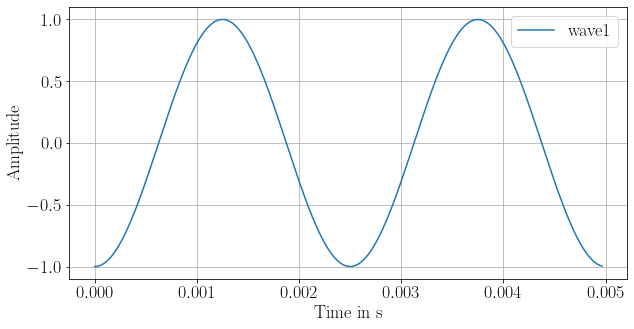

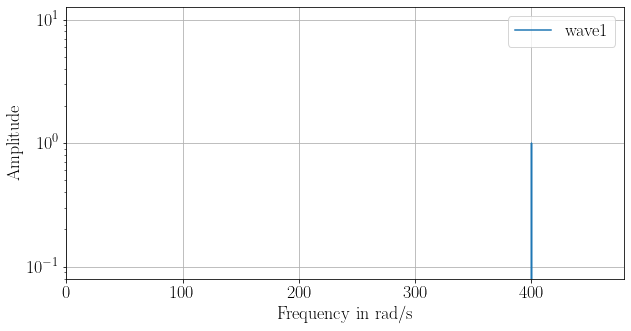

In [5]:
time, signal1 = generate_wave(FREQUENCY,SAMPLE_RATE,DURATION,phaseshift=PHASE)
plot_vs_time(time,wave1=signal1,show_time=2/FREQUENCY)
plot_rfft_amp(time,wave1=signal1,xlim=[0,1.2*FREQUENCY])

## Arten von Modulation
Wird ein periodisches Signal betrachtet können primär drei Parameter variert werden.  
Wird die Amplitude verändert spricht man von der Amplitudenmodulation.  
Wird die Frequenz verändert spricht man von der Frequenzmodulation.  
Wird die Phase verändert spricht man von der Phasenmodulation.  

In [6]:
Eq(ut,cos(w*t+phi))

u(t) = cos(\varphi + ω⋅t)

## AM Modulation
Die Amplitudenmodulation lässt sich mathematisch wie folgt anschreiben.

In [7]:
utAMeq1=Eq(utAM,(Uc+utm)*cos(wc*t))
display(utAMeq1)
utAMeq2=Eq(utAM,(Uc+Um*cos(wm*t))*cos(wc*t))
#display(utAMeq2)

u(t)_AM = (U_c + u(t)ₘ)⋅cos(ω_c⋅t)

Durch Umformen erhält man eine Gleichung aus der direkt der Modulationsgrad ablesbar ist.

In [8]:
utAMeq2=Eq(utAM,Uc*(1+(Um/Uc)*cos(wm*t+phi))*cos(wc*t))
display(utAMeq2)
meq1=Eq(m,Um/Uc)
display(meq1)

              ⎛    Uₘ⋅cos(\varphi + ωₘ⋅t)⎞           
u(t)_AM = U_c⋅⎜1 + ──────────────────────⎟⋅cos(ω_c⋅t)
              ⎝             U_c          ⎠           

     Uₘ
m = ───
    U_c

### Modulationsgrad
Der Modulationsgrad muss kleiner gleich 1 sein. An folgendem Beispiel kann der Einfluss des Modulationsgrade probiert werden.

In [9]:
#Carrier
FREQUENCY_C = 10*10**4
AMPLITUDE_C = 10

#Modulator
FREQUENCY_M = 20*10**3
AMPLITUDE_M = 8

m = 0.8

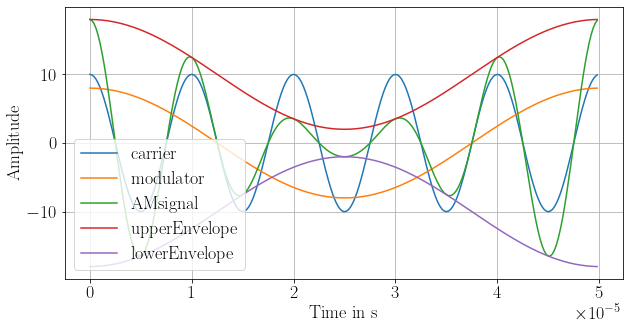

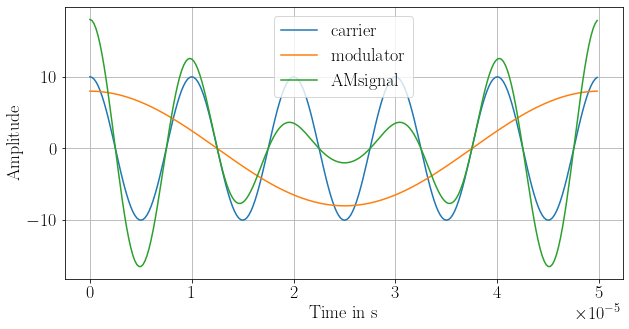

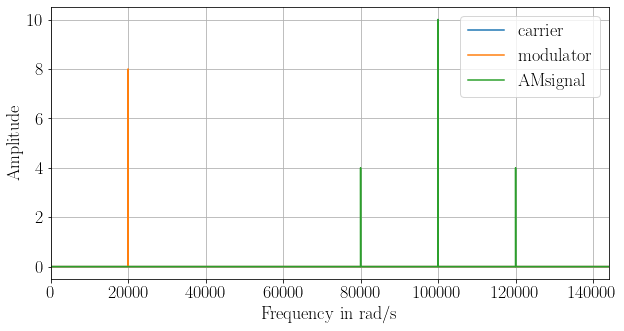

In [10]:
#General Settings
SAMPLE_RATE = 50*FREQUENCY_C
DURATION = 1/FREQUENCY_M*1000

#Generate Signals
time, voltage_c = generate_wave(FREQUENCY_C,SAMPLE_RATE,DURATION,amplitude=AMPLITUDE_C,form='cos')
time, voltage_m = generate_wave(FREQUENCY_M,SAMPLE_RATE,DURATION,amplitude=AMPLITUDE_M,form='cos')

#Show Modulation factor
display(Eq(m,AMPLITUDE_M/AMPLITUDE_C))

#Modulated Signal
_,voltage = generate_AM_wave(FREQUENCY_C, AMPLITUDE_C, FREQUENCY_M, AMPLITUDE_M, SAMPLE_RATE, DURATION)

plot_vs_time(time,carrier=voltage_c,modulator=voltage_m,AMsignal=voltage,upperEnvelope=voltage_m+10,lowerEnvelope=-(voltage_m+10),show_time=1/FREQUENCY_M)
plot_vs_time(time,carrier=voltage_c,modulator=voltage_m,AMsignal=voltage,show_time=1/FREQUENCY_M)
plot_rfft_amp(time,carrier=voltage_c,modulator=voltage_m,AMsignal=voltage,xlim=[0,1.2*(FREQUENCY_C+FREQUENCY_M)],yscale='linear')

Die Trägerfrequenz und die Frequenz des Modulators ist gut zu erkenne. Das resultierende AM modulierte Signal besteht aus drei Frequenzen. Der Trägerfrequenz und die um die Frequenz des Modulators nach Links und Rechts der Trägerfrequenz verschobenen Teile. Diese werden als oberes und unteres Seitenband bezeichnet.

### Bandbreite
Bei der Übertragung wird nicht nur eine Frequenz übertragen sondern ein Frequenzspecktrum. Zum Beipiel Sprache zwischen 20 Hz und 20 kHz. Daraus ergibt sich eine mindestens benötigte Bandbreite. Also ein Mindestabstand zwischen der Frequenz des Trägers und der frequenz des Modulators.

In [11]:
BAMeq1 = Eq(BAM,2*fmmax)
display(BAMeq1)

B_AM = 2⋅fₘ ₘₐₓ

In [12]:
#Carrier
FREQUENCY_C = 1*10**4
AMPLITUDE_C = 10

#General Settings
SAMPLE_RATE = 50*FREQUENCY_C
DURATION = 1/FREQUENCY_M*10**5

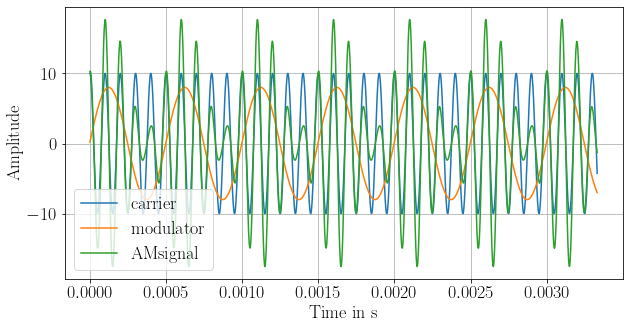

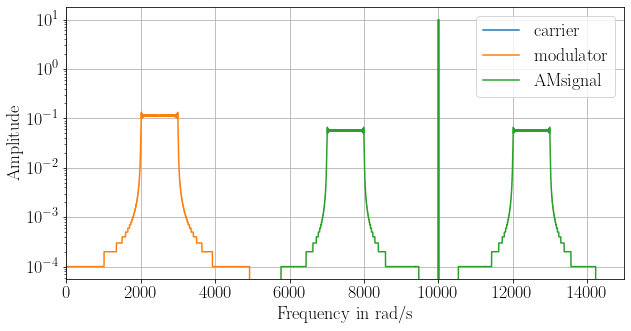

In [13]:
#carrier generation
time, voltage_c = generate_wave(FREQUENCY_C,SAMPLE_RATE,DURATION,amplitude=AMPLITUDE_C,form='cos')

#Random modulator signal
time, voltage_m = generate_wavelet(2000,3000,AMPLITUDE_M,SAMPLE_RATE, DURATION)

#Modulated Signal
_,voltage = generate_AM_wave2(time,FREQUENCY_C,AMPLITUDE_C,voltage_m)

plot_vs_time(time,carrier=voltage_c,modulator=voltage_m,AMsignal=voltage,show_time=1/300)
plot_rfft_amp(time,carrier=voltage_c,modulator=voltage_m,AMsignal=voltage,xlim=[0*FREQUENCY_C,1.5*FREQUENCY_C])

### Leistungsbetrachtung
Ein Nachteil der AM Modulation ist die Leistungsaufteilung zwischen Träger und dem Nutzsignal, dem Modulator. Die Gesamtleistung des modulierten Signales ergibt sich aus der Summe der Leistungen des Trägers, des oberen und des unteren Seitenbandes. {cite}`TPAM`

In [14]:
PAMeq1=Eq(PAM,Pc+PUSB+PLSB)
display(PAMeq1)

P_AM = P_LSB + P_USB + P_c

Die Leistung eines reinen Cosinus Signales kann einfach über den Effektivwert berechnet werden.

In [15]:
Peq1=Eq(P,Urms**2/R)
display(Peq1)
Urmseq1=Eq(Urms,1/sqrt(2)*U)
#display(Urmseq1)

        2
    Uᵣₘₛ 
P = ─────
      R  

\$ U_{rms} = \frac{U}{\sqrt{2}} \$  
Für die einzelnen Leistungen ergeben sich unter Berücksichtigung des Modulationsfaktors folgende Gleichungen.

In [16]:
display(meq1)
Pceq1=Eq(Pc,(Uc/sqrt(2))**2/R)
display(Pceq1)
PUSBeq1=Eq(PUSB,(Uc*m/(2*sqrt(2)))**2/R)
display(PUSBeq1)
PLSBeq1=Eq(PLSB,(Uc*m/(2*sqrt(2)))**2/R)
display(PLSBeq1)

     Uₘ
m = ───
    U_c

         2
      U_c 
P_c = ────
      2⋅R 

           2  2
        U_c ⋅m 
P_USB = ───────
          8⋅R  

           2  2
        U_c ⋅m 
P_LSB = ───────
          8⋅R  

Werden diese Gleichungen nun Addiert ergibt sich die, von dem Modulationsgrad abhängige, Leistung des modulierten Signals.

In [17]:
PAMeq2=Eq(PAM,Pceq1.rhs+PUSBeq1.rhs+PLSBeq1.rhs)
#display(PAMeq2)

\$ P_{AM}=\frac{U_c^2}{2R} (1+\frac{m^2}{2}) = P_c (1+\frac{m^2}{2}) \$  
Für einen Modulationsgrad von \$ m=1 \$ ergibt sich die Gesamtleistung zu \$ P_{AM} = 1,5 P_c \$. Wird nun noch das Verhältnis von Trägersignalleistung und Informationssignal (Modulator) gebildet ergibt sich ein Verhältniss von \$ P_c/P_{SB}=4 \$. Das bedeutet, dass das Trägersignal, welches keine Information beinhaltet, vier mal so Leistungsstark ist als das Informationssignal, welches die information beinhaltet. Bezogen auf das Modulierte Signal bedeutet dies, dass nur ein 1/6 der Leistung für die Informationsübermittlung verwendet wird. Ist der Modulationsgrad kleiner als 1 wird das verhältnis noch nachteiliger.  
Durch eliminieren des Trägers wird versucht diesen Nachteil zu unterdrücken. 
* Amplitudenmodulation mit Träger (DSBFC) - wird hier besprochen.
* Amplitudenmodulation mit unterdrücktem Träger (Double side band suppressed carrier) DSBSC 
* Amplitudenmodulation ohne Träger  

Weiters kann die AM optimiert werden indem nur ein Seitenband verwendet wird, da der informationsgehalt identisch ist, SSB (single side band).

In [18]:
#Carrier
FREQUENCY_C = 10*10**4
AMPLITUDE_C = 10

#Modulator
FREQUENCY_M = 20*10**3
AMPLITUDE_M = 10

m = 1.0

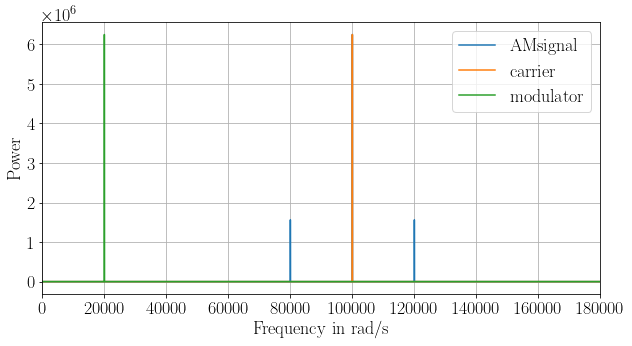

In [19]:
#General Settings
SAMPLE_RATE = 50*FREQUENCY_C
DURATION = 1/FREQUENCY_M*1000

#Generate Signals
time, voltage_c = generate_wave(FREQUENCY_C,SAMPLE_RATE,DURATION,amplitude=AMPLITUDE_C,form='cos')
time, voltage_m = generate_wave(FREQUENCY_M,SAMPLE_RATE,DURATION,amplitude=AMPLITUDE_M,form='cos')

#Show Modulation factor
display(Eq(m,AMPLITUDE_M/AMPLITUDE_C))

#Modulated Signal
_,voltage = generate_AM_wave(FREQUENCY_C, AMPLITUDE_C, FREQUENCY_M, AMPLITUDE_M, SAMPLE_RATE, DURATION)

plot_rfft_amp(time,AMsignal=voltage,carrier=voltage_c,modulator=voltage_m,xlim=[0,1.5*(FREQUENCY_C+FREQUENCY_M)],ytype='pow',yscale='linear')

### Modulationstrapez


In [20]:
#Carrier
FREQUENCY_C = 1*10**4
AMPLITUDE_C = 10

#Modulator
AMPLITUDE_M = 8
FREQUENCY_M_min = 2000
FREQUENCY_M_max = 3000

Untermodulation \$ m < 1 \$

m = 0.8

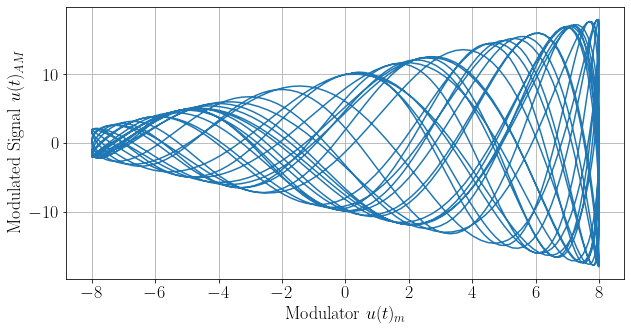

In [21]:
#General Settings
SAMPLE_RATE = 50*FREQUENCY_C
DURATION = 1/FREQUENCY_M_min*10**1

#Random modulator signal
time, voltage_m = generate_wavelet(FREQUENCY_M_min,FREQUENCY_M_max,AMPLITUDE_M,SAMPLE_RATE, DURATION)

#Modulated Signal
_,voltage = generate_AM_wave2(time,FREQUENCY_C,AMPLITUDE_C,voltage_m)

## under modulation
display(Eq(m,AMPLITUDE_M/AMPLITUDE_C))
plt_mod_trap(voltage_m,voltage)

Ideale Modulation \$ m = 1 \$

m = 1.0

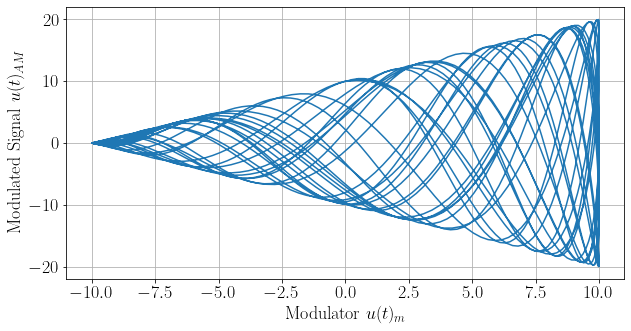

In [22]:
## perfect modulation
#Modulator
AMPLITUDE_M = 10

#Random modulator signal
time, voltage_m = generate_wavelet(FREQUENCY_M_min,FREQUENCY_M_max,AMPLITUDE_M,SAMPLE_RATE, DURATION)
#Modulated Signal
_,voltage = generate_AM_wave2(time,FREQUENCY_C,AMPLITUDE_C,voltage_m)
display(Eq(m,AMPLITUDE_M/AMPLITUDE_C))
plt_mod_trap(voltage_m,voltage)

Übermodulation \$ m >1 \$

m = 1.4

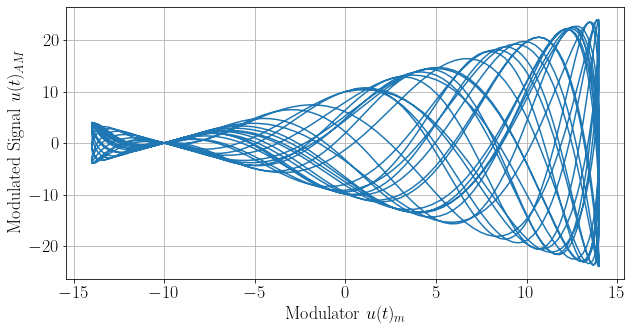

In [23]:
## over modulation
#Modulator
AMPLITUDE_M = 14
#Random modulator signal
time, voltage_m = generate_wavelet(FREQUENCY_M_min,FREQUENCY_M_max,AMPLITUDE_M,SAMPLE_RATE, DURATION)
#Modulated Signal
_,voltage = generate_AM_wave2(time,FREQUENCY_C,AMPLITUDE_C,voltage_m)
display(Eq(m,AMPLITUDE_M/AMPLITUDE_C))
plt_mod_trap(voltage_m,voltage)